<div class="alert alert-block alert-info">
    <h1>Problem Statement</h1>
</div>

Banks and finance companies are facing acute problem of financial loss in terms of loan defaulters. Borrowers often do cheat and become defaulters. These companies want some insight derived from their past experience and data to expose all the driving factors that result into a borrower to become a defaulter.

<div class="alert alert-block alert-info">
<h2>Intuition</h2> Before  doing exploratory analysis after loading datasets, there some intuitions coming out after going through this business problem.<br>
    Below are the list of intuitions comrising the posssible root cause and hypothesis behind loan defaulters:<br>

</div>

<div class="list-group">
<button type="button" class="list-group-item list-group-item-action active">
Hypothesis and intuitions for loan default cases
</button>
<button type="button" class="list-group-item list-group-item-action">Large Loan Amount</button>
<button type="button" class="list-group-item list-group-item-action">Lower CIBIL(FICO) score</button>
<button type="button" class="list-group-item list-group-item-action">Past default history</button>
<button type="button" class="list-group-item list-group-item-action">Multiple running/active loans</button>
<button type="button" class="list-group-item list-group-item-action">Single earning person in the family member</button>
<button type="button" class="list-group-item list-group-item-action">Salaried person has less chance to default as comapared to business person due to risk factor.</button>
<button type="button" class="list-group-item list-group-item-action">Government employees has less chance to default as comapared to private employees due to risk factor.</button>
<button type="button" class="list-group-item list-group-item-action">Large family size and more dependent members</button>
<button type="button" class="list-group-item list-group-item-action">Health problems of the borrower or its family members</button>
<button type="button" class="list-group-item list-group-item-action">High interest rate from banks</button>
<button type="button" class="list-group-item list-group-item-action">No assets and parental property</button>
</div>

<div class="alert alert-block alert-success">
<h2>Loading Packages</h2>
    Also applying CSS code to make UI better
</div>

In [1]:
# import the packages
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# full columns list view and data frame css
pd.set_option('display.max_columns', None)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# get current working directory
%pwd

'D:\\Study\\Python\\Teclov\\Assignments\\Assignment-5\\Assignment-5'

In [5]:
# suprressing warning messages for cleaner presentation
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<h2>Loading data</h2>
    Load both the datsets- data dictionary and loan
</div>

In [6]:
# import data
df_data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
df_loan = pd.read_csv('loan.csv')

In [7]:
# exploring top and last rows
df_data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [8]:
df_data_dictionary.tail()

,LoanStatNew,Description
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN
116,NaN,* Employer Title replaces Employer Name for al...


In [9]:
# getting shape
df_data_dictionary.shape

(117, 2)

Data dictionary has two columns and 117 rows. Each row represents the column name and its description (last tow rows are information only, we have 115 valid columns)

In [10]:
# getting information
df_data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
LoanStatNew    115 non-null object
Description    116 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [11]:
df_data_dictionary['LoanStatNew'].value_counts()>1

chargeoff_within_12_mths          False
last_credit_pull_d                False
application_type                  False
num_bc_tl                         False
int_rate                          False
mths_since_rcnt_il                False
open_il_6m                        False
tot_hi_cred_lim                   False
tot_coll_amt                      False
num_tl_120dpd_2m                  False
fico_range_high                   False
total_rec_prncp                   False
open_il_24m                       False
total_acc                         False
emp_length                        False
member_id                         False
collection_recovery_fee           False
sub_grade                         False
purpose                           False
title                             False
mort_acc                          False
num_rev_accts                     False
num_sats                          False
id                                False
issue_d                           False


In [12]:
len(df_data_dictionary['LoanStatNew'].unique())

116

In [13]:
df_data_dictionary['LoanStatNew'].nunique()

115

In [14]:
# LoanStatNew is unique in the dataset

In [15]:
# Loan-getting top rows
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
#fecthing few last records

In [17]:
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [18]:
# getting shape
df_loan.shape

(39717, 111)

Loan data comprises 39717 rows and 111 columns. It seems that there are many columns that needs to explored. There would be many columns that are not required to do the analysis and have any insight as per the problem statement. We will reomve those and will keep only the relevant ones for the convenience and performance. After looking at the data, it also seems that there are a lot of impurites in the form of <b>null/NAN</b> values. We also need to take care of these as a part of data cleaning.

<div class="alert alert-block alert-success">
<h2>Data Preparation and Cleaning</h2>
  
</div>

In [19]:
# checking data information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [20]:
# getting columns
print(list(df_loan.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [21]:
# getting categorical fields
print(list(df_loan.select_dtypes([np.object])))

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [22]:
# getting list of float/numerical column names
print(list(df_loan.select_dtypes([np.int64,np.float64])))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt

<div class="alert alert-block alert-warning">
<h4>1. Handling missing data</h4><br> 
</div>
 Missing data is represented using either of the two objects NaN (Not a Number) or NULL. These impurities usually come dut to:-<br>
 -  Human-errors
 -  Unknwon values
 -  Data unavailable

In [23]:
# checking null values
df_loan.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,

Output shows that there are many null/NaN values. Let's check the count of null/NaN values for each column.

In [24]:
# column wise null count
df_loan.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit     39717
mo_sin_old_rev_tl_op           39717
bc_util                        39717
bc_open_to_buy                 39717
avg_cur_bal                    39717
acc_open_past_24mths           39717
inq_last_12m                   39717
total_cu_tl                    39717
inq_fi                         39717
total_rev_hi_lim               39717
all_util                       39717
max_bal_bc                     39717
open_rv_24m                    39717
open_rv_12m                    39717
il_util                        39717
total_bal_il                   39717
mths_since_rcnt_il             39717
open_il_24m                    39717
open_il_12m                    39717
open_il_6m                     39717
open_acc_6m                    39717
tot_cur_bal                    39717
tot_coll_amt                   39717
total_bc_limit                 39717
dti_joint                      39717
annual_inc_joint               39717
mths_since_last_major_derog    39717
m

Above output tells us that there are many columns that have complete null values and some columns that have null values in maximum proportion.<br>
Let's see the null values in percentage form

In [25]:
round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2).sort_values(ascending=False)

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

In [26]:
pd_series_null_count = round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2).sort_values(ascending=False)

In [27]:
pd_series_null_count.head()

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
dtype: float64

In [28]:
# extracting columns which have 100% null values
cols_to_drop = list(pd_series_null_count[pd_series_null_count==100.0].index)

In [29]:
cols_to_drop

['total_il_high_credit_limit',
 'mo_sin_old_rev_tl_op',
 'bc_util',
 'bc_open_to_buy',
 'avg_cur_bal',
 'acc_open_past_24mths',
 'inq_last_12m',
 'total_cu_tl',
 'inq_fi',
 'total_rev_hi_lim',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'il_util',
 'total_bal_il',
 'mths_since_rcnt_il',
 'open_il_24m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'tot_cur_bal',
 'tot_coll_amt',
 'total_bc_limit',
 'dti_joint',
 'annual_inc_joint',
 'mths_since_last_major_derog',
 'mo_sin_old_il_acct',
 'verification_status_joint',
 'mo_sin_rcnt_rev_tl_op',
 'num_il_tl',
 'mo_sin_rcnt_tl',
 'total_bal_ex_mort',
 'tot_hi_cred_lim',
 'percent_bc_gt_75',
 'pct_tl_nvr_dlq',
 'num_tl_90g_dpd_24m',
 'num_tl_30dpd',
 'num_tl_120dpd_2m',
 'num_sats',
 'num_rev_tl_bal_gt_0',
 'num_rev_accts',
 'num_op_rev_tl',
 'num_tl_op_past_12m',
 'num_bc_tl',
 'mort_acc',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'num_accts_ever_120_pd',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_inq',
 'mths_si

In [30]:
# take count
len(cols_to_drop)

54

There are 54 columns which have 100% null/NaN values and need to be dropped.

Removing those columns which have 100% null values in first step

In [31]:
for col in cols_to_drop:
    df_loan.drop(col, axis=1, inplace=True)

In [32]:
# checking data frame
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [33]:
df_loan.shape

(39717, 57)

Now we have 57 columns. Let's check for other null values columns

In [34]:
round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
acc_now_delinq                 0.00
application_type               0.00
url                            0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
delinq_amnt                    0.00
sub_grade                      0.00
grade                          0.00
installment                 

Here only four columns which have major proportion of null values (above 30%). let's drop those columns too.

In [35]:
df_loan.drop('next_pymnt_d', axis=1, inplace=True)
df_loan.drop('mths_since_last_record', axis=1, inplace=True)
df_loan.drop('mths_since_last_delinq', axis=1, inplace=True)
df_loan.drop('desc', axis=1, inplace=True)

In [36]:
# checking rest null values
round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2).sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
addr_state                    0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
zip_code            

In [37]:
# list out all columns containing null values
col_null_val = ['emp_title','emp_length', 'pub_rec_bankruptcies', 'last_pymnt_d',
                'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 
                'revol_util', 'tax_liens', 'title', 'last_credit_pull_d']

In [38]:
col_null_val

['emp_title',
 'emp_length',
 'pub_rec_bankruptcies',
 'last_pymnt_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'revol_util',
 'tax_liens',
 'title',
 'last_credit_pull_d']

Let's deal these columns one by one as I cannot drop these columns(very less % of null records)

In [39]:
# 1. emp_title
df_loan[col_null_val[0]].head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [40]:
# getting unique
df_loan[col_null_val[0]].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [41]:
# getting  no. of unique values
df_loan[col_null_val[0]].nunique()

28820

Since emp_title is a categorical field, we cannot impute it with most frequent title(mode) in this case. So we fill na with **Not Available** value

In [42]:
df_loan[col_null_val[0]].fillna('Not Available', inplace=True)

In [43]:
#checking null
round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2).sort_values(ascending=False)

emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
url                           0.00
home_ownership                0.00
pymnt_plan                    0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
annual_inc                    0.00
sub_grade                     0.00
emp_title                     0.00
addr_state                    0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
zip_code            

In [44]:
# 2. emp_length
col_null_val[1]

'emp_length'

In [45]:
df_loan[col_null_val[1]].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [46]:
#taking count of each emp_length- Employement length
df_loan[col_null_val[1]].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

<b>Intuition</b>- emp_length means Employement work experience and for null values, we cannot impute mode or any other central value. So this lies in others category like(Others-Self-Employeed, own-business, free- lancers)

In [47]:
# imputing it with Others
df_loan[col_null_val[1]].fillna('Others', inplace=True)

In [48]:
df_loan[col_null_val[1]].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Others       1075
Name: emp_length, dtype: int64

In [49]:
# 3. Lets deal with pub_rec_bankruptcies- No of public records bankruptcy
col_null_val[2]

'pub_rec_bankruptcies'

In [50]:
df_loan[col_null_val[2]].unique()

array([ 0.,  1.,  2., nan])

In [51]:
df_loan[col_null_val[2]].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

<b>Intuition</b>- Since pub_rec_bankruptcies represents No. of public records bankruptcy. If the value is null, we can consider that the borrower does not have any.
<br>
Let's impute it with zero(0)

In [52]:
df_loan[col_null_val[2]].fillna(0.0, inplace=True)

In [53]:
# cheking data
df_loan[col_null_val[2]].unique()

array([0., 1., 2.])

In [54]:
df_loan[col_null_val[2]].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [55]:
# 4. last_pymnt_d column-> Last month payment received date
col_null_val[3]

'last_pymnt_d'

In [56]:
# cheking unique values
df_loan[col_null_val[3]].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [57]:
df_loan[df_loan['last_pymnt_d'].isna()] [['loan_status','last_pymnt_amnt']]

,loan_status,last_pymnt_amnt
26,Charged Off,0.0
2724,Charged Off,0.0
3613,Charged Off,0.0
3985,Charged Off,0.0
4206,Charged Off,0.0
4803,Charged Off,0.0
5716,Charged Off,0.0
6253,Charged Off,0.0
6259,Charged Off,0.0
6768,Charged Off,0.0


<b>Intuition</b>- <b>last_pymnt_d</b> represents Last month payment received. Also we can see from above records that for all such records, all borrowers are declared as Charged-Off(defaulters) and last payment amount is 0.
<br>
In this we do not have any proper value to impute. so we are filling it with 'Not Available'
<br>


In [58]:
df_loan[col_null_val[3]].fillna('Not Available', inplace=True)

In [59]:
# checking the data
df_loan[col_null_val[3]].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', 'Not Available', 'Dec-12', 'Dec-14',
       'Aug-13', 'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14',
       'Aug-12', 'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15',
       'Feb-14', 'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14',
       'Mar-15', 'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15',
       'Nov-15', 'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12',
       'May-12', 'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15',
       'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09'

In [60]:
# 5. collections_12_mths_ex_med
col_null_val[4]

'collections_12_mths_ex_med'

In [61]:
df_loan[col_null_val[4]].unique()

array([ 0., nan])

<b>Intuition</b>- Here all the values other than nan are 0, so imputing it with zero

In [62]:
df_loan[col_null_val[4]].fillna(0, inplace=True)

In [63]:
# cheking the result
df_loan[col_null_val[4]].unique()

array([0.])

In [64]:
# 6. chargeoff_within_12_mths
col_null_val[5]

'chargeoff_within_12_mths'

In [65]:
df_loan[col_null_val[5]].unique()

array([ 0., nan])

<b>Intuition</b>- Here all the values other than nan are 0, so imputing it with zero

In [66]:
df_loan[col_null_val[5]].fillna(0, inplace=True)

In [67]:
# cheking the result
df_loan[col_null_val[5]].unique()

array([0.])

In [68]:
# 7 revol_util- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. 
 
col_null_val[6]

'revol_util'

In [69]:
df_loan[col_null_val[6]].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [70]:
df_loan[col_null_val[6]].value_counts().sort_values(ascending = False)

0%        977
0.20%      63
63%        62
66.70%     58
0.10%      58
40.70%     58
61%        57
66.60%     57
31.20%     57
46.40%     57
65.90%     56
70.40%     56
57.40%     55
48.90%     55
37.60%     55
25.50%     55
49.80%     55
64.80%     55
68.60%     54
64.60%     54
51.60%     54
27.20%     54
51.10%     54
89.50%     54
46.60%     54
35.30%     54
75.50%     54
32%        54
78.70%     54
76.60%     54
         ... 
21.59%      1
58.77%      1
0.05%       1
26.33%      1
0.12%       1
2.64%       1
29.53%      1
7.28%       1
0.01%       1
9.34%       1
0.46%       1
70.26%      1
23.11%      1
11.62%      1
21.92%      1
46.74%      1
17.78%      1
8.01%       1
25.74%      1
5.34%       1
0.04%       1
5.79%       1
33.29%      1
56.26%      1
10.08%      1
26.32%      1
33.39%      1
0.03%       1
24.63%      1
36.88%      1
Name: revol_util, Length: 1089, dtype: int64

In [71]:
# imputing the NaN values with the 0.0
df_loan[col_null_val[6]].fillna('0.0%', inplace=True)

In [72]:
# 8. tax_liens
col_null_val[7]

'tax_liens'

In [73]:
df_loan[col_null_val[7]].unique()

array([ 0., nan])

<b>Intuition</b>- Here all the values other than nan are 0, so imputing it with zero

In [74]:
df_loan[col_null_val[7]].fillna(0, inplace=True)

In [75]:
df_loan[col_null_val[7]].unique()

array([0.])

In [76]:
#9 title - The loan title provided by the borrower 

col_null_val[8]

'title'

In [77]:
df_loan[col_null_val[8]].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

<b>Intuition</b>- For NAN , we can replace it with 'Other' loan

In [78]:
df_loan[col_null_val[8]].fillna('Other', inplace=True)

In [79]:
# 10 last_credit_pull_d-- The most recent month LC pulled credit for this loan  

col_null_val[9]

'last_credit_pull_d'

In [80]:
df_loan[col_null_val[9]].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

<b>Intuition</b>- For NAN , we can replace it with Not Available

In [81]:
df_loan[col_null_val[9]].fillna('Not Available', inplace=True)

In [82]:
#checking the null values
round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2).sort_values(ascending=False)

tax_liens                     0.0
earliest_cr_line              0.0
dti                           0.0
addr_state                    0.0
zip_code                      0.0
title                         0.0
purpose                       0.0
url                           0.0
pymnt_plan                    0.0
loan_status                   0.0
issue_d                       0.0
verification_status           0.0
annual_inc                    0.0
home_ownership                0.0
emp_length                    0.0
emp_title                     0.0
sub_grade                     0.0
grade                         0.0
installment                   0.0
int_rate                      0.0
term                          0.0
funded_amnt_inv               0.0
funded_amnt                   0.0
loan_amnt                     0.0
member_id                     0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
pub_rec_bankruptcies          0.0
open_acc                      0.0
delinq_amnt   

We have removed all the NaN values

In [83]:
# checking data frame
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Available,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [84]:
df_loan.shape

(39717, 53)

### Treating Missing Values in Rows

Now, we need to either delete or impute the missing values. First, let's see if there are any rows having a significant number of missing values. If so, we can drop those rows, and then take a decision to delete or impute the rest.

After dropping three columns, we now have 53 columns to work with. Just to inspect rows with missing values, let's have a look at the rows having more than 16 (> 30% columns) missing values.

In [85]:
df_loan[df_loan.isnull().sum(axis=1) > 16]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


 No records to delete

<div class="alert alert-block alert-warning">
<h4>2. Dealing with data types</h4><br> 
</div>
Now, we need to check the value and its data type. If the value should be numeric but its type is string, then we need to convert it accordingly.

In [86]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     39717 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

<b>Fact</b>- After looking above data type of the each column and it's description, I found that there are few columns that are numerical in nature but have data type as object(string)<br>
1. term
2. int_rate
3. revol_util <br>
These need to get converted to numeric

In [87]:
df_loan['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

If we replace the months character from the last, then it can be converted into numeric

In [88]:
# converting to numeric
df_loan['term'] = df_loan['term'].apply(lambda x: x.replace(' months',''))

In [89]:
df_loan['term'].head()

0     36
1     60
2     36
3     36
4     60
Name: term, dtype: object

In [90]:
df_loan['term'] = df_loan['term'].apply(pd.to_numeric)

In [91]:
# 2 int_rate

In [92]:
df_loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

If we replace the % character from the last, then it can be converted into numeric

In [93]:
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: x.replace('%',''))

In [94]:
df_loan['int_rate'] = df_loan['int_rate'].apply(pd.to_numeric)

In [95]:
# 3 revol_util

In [96]:
df_loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [97]:
df_loan['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [98]:
df_loan['revol_util'] = df_loan['revol_util'].apply(lambda x: x.replace('%',''))

In [99]:
df_loan['revol_util'] = df_loan['revol_util'].apply(pd.to_numeric)

In [100]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,Not Available,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<div class="alert alert-block alert-warning">
<h4>3. Checking for duplicate records</h4><br> 
</div>

In [101]:
df_loan.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,C,C5,Not Available,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,F,F2,Not Available,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60,13,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,

In [102]:
df_loan.shape

(39717, 53)

In [103]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null int64
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     39717 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

There are no duplicate records

<div class="alert alert-block alert-warning">
<h4>4. Dropping unnecessary columns</h4><br> 
</div>

In [104]:
#check for single valued columns and drop them
print(df_loan.pymnt_plan.value_counts())
print(df_loan.initial_list_status.value_counts())
print(df_loan.policy_code.value_counts())
print(df_loan.tax_liens.value_counts())
print(df_loan.collections_12_mths_ex_med.value_counts())
print(df_loan.application_type.value_counts())
print(df_loan.acc_now_delinq.value_counts())
print(df_loan.chargeoff_within_12_mths.value_counts())
print(df_loan.delinq_amnt.value_counts())


n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
1    39717
Name: policy_code, dtype: int64
0.0    39717
Name: tax_liens, dtype: int64
0.0    39717
Name: collections_12_mths_ex_med, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39717
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64


**Intuition**:- All these columns have only single distinct value and could not give insight for the Charged-Off cases.

In [105]:
#drop those columns
#dropping 'id','member_id','url' also.
drop_cols = ['id','member_id','url','pymnt_plan','initial_list_status',
             'policy_code','tax_liens','collections_12_mths_ex_med','application_type','acc_now_delinq',
             'chargeoff_within_12_mths','delinq_amnt']
for col in drop_cols:
    df_loan.drop(col,axis=1, inplace=True)

In [106]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Not Available,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [107]:
df_loan.shape

(39717, 41)

<div class="alert alert-block alert-success">
<h2>Feature Engineering</h2>
  
</div>
In this step we will create new columns as per the requirement like loan issues month, year from loan issued date.

In [108]:
# derive month and year from loan issue date
df_loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

<b>Intuition</b>- Assuming that all the loan disbursed in twentieth century. If we split that issue_d by - we can get month and year by concatenating 20 in the second part<br>

In [109]:
df_loan['Issued_Month'] = df_loan['issue_d'].apply(lambda x: x.split('-')[0])
df_loan['Issued_Year'] = df_loan['issue_d'].apply(lambda x: '20'+x.split('-')[1])

In [110]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issued_Month,Issued_Year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Not Available,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011


In [111]:
df_loan.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issued_Month,Issued_Year
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.1,40,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,0.0,Jul,2007
39713,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.9,9,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,0.0,Jul,2007
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,Not Available,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.4,20,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,0.0,Jul,2007
39715,5000,5000,650.0,36,7.43,155.38,A,A2,Not Available,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.7,26,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,0.0,Jul,2007
39716,7500,7500,800.0,36,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,7,0,4175,51.5,8,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10,0.0,Jun,2007


extracting zip from zip_code by removing last XX characters

In [112]:
df_loan['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [113]:
df_loan['Zip'] = df_loan['zip_code'].apply(lambda x: x.replace('x',''))

In [114]:
df_loan.Zip.head()

0    860
1    309
2    606
3    917
4    972
Name: Zip, dtype: object

In [115]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issued_Month,Issued_Year,Zip
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,860
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,309
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Not Available,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,606
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,917
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,972


<div class="alert alert-block alert-success">
<h2>Univariate Analysis</h2>
    
</div>

<div class="alert alert-block alert-info">
<h4>#1 Categorical fields univariate analysis</h4>
    
</div>

In [116]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  39717 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
title                      39717 non-null object
zip_code                   39717 non-null object
addr_sta

In [117]:
# getting categorical columns
cat_cols = list(df_loan.select_dtypes([np.object]))

In [118]:
cat_cols

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'Issued_Month',
 'Issued_Year',
 'Zip']

In [119]:
df_loan.grade.head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [120]:
#value counts
df_loan.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

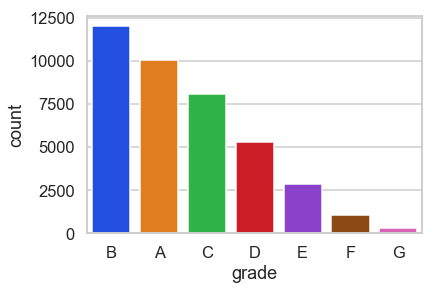

In [121]:
# count plot
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_loan.grade, order=df_loan.grade.value_counts().index, palette='bright')
plt.show()

Fact: Grade 'B' lonas are mostly purchased

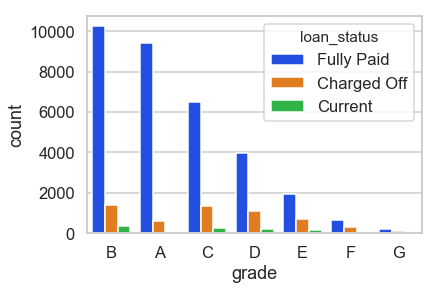

In [122]:
#Grade with respect to loan status
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_loan.grade, order=df_loan.grade.value_counts().index, palette='bright', hue=df_loan.loan_status)
plt.show()

Fact:- Lower grades are more prone to loan default

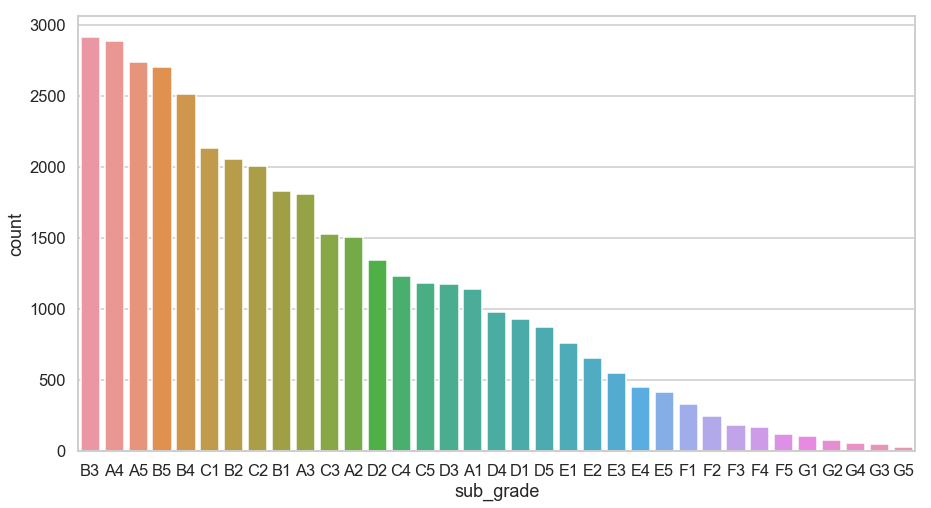

In [123]:
# sub_grade
fig, ax = plt.subplots(figsize = [15,8])
sns.countplot(df_loan.sub_grade, order=df_loan.sub_grade.value_counts().index)
plt.show()

Fact: Sub_Grade 'B3' is mostly purchased

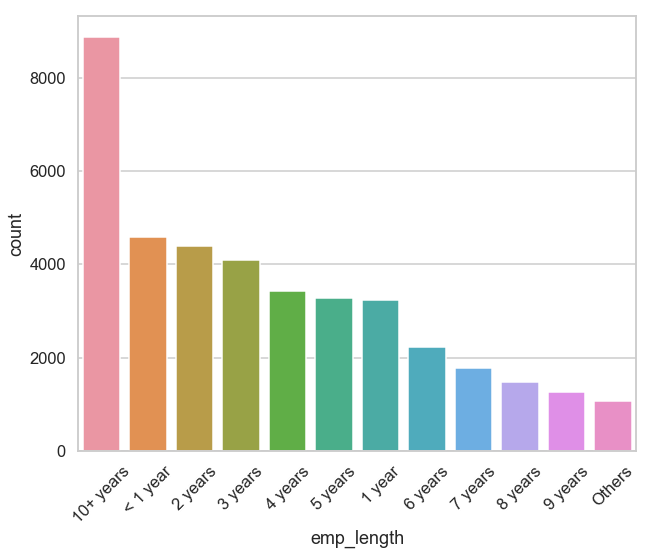

In [124]:
# emp_length
fig, ax = plt.subplots(figsize = [10,8])
g = sns.countplot(df_loan.emp_length, order=df_loan.emp_length.value_counts().index)
g.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Fact: Mostly loan borowers are employed for 10 or more years

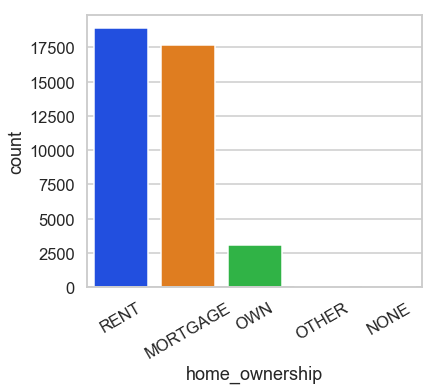

In [125]:
# emp_length
fig, ax = plt.subplots(figsize = [6,5])
g = sns.countplot(df_loan.home_ownership, order=df_loan.home_ownership.value_counts().index, palette='bright')
g.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

Mostly loans are taken by those members who are either on 'Rent' or on 'Mortgage'

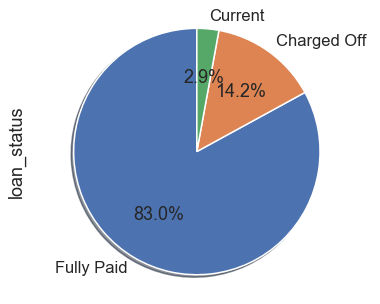

In [126]:
df_loan.loan_status.value_counts().plot(kind='pie',
                            figsize=(6, 5),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True
                           )
plt.axis('equal')
plt.show()

Fact:- 14.2 % of loan cases became defaulter

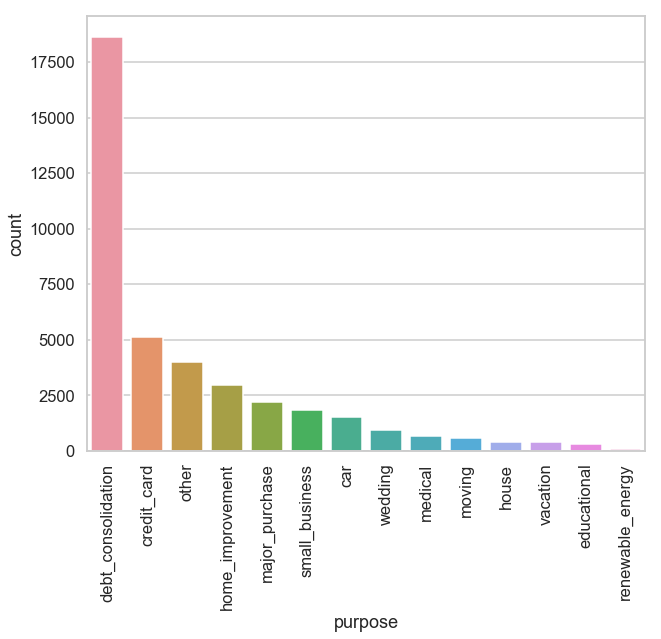

In [127]:
# purpose
fig, ax = plt.subplots(figsize = [10,8])
g = sns.countplot(df_loan.purpose, order=df_loan.purpose.value_counts().index)
g.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

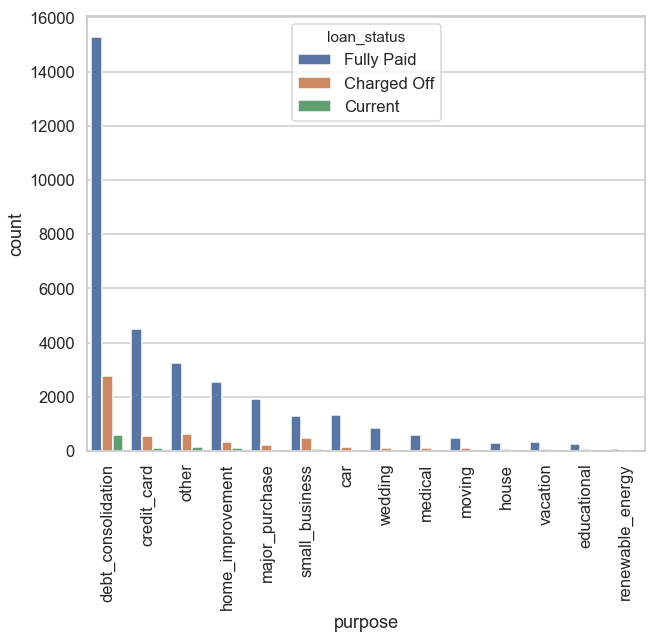

In [128]:
fig, ax = plt.subplots(figsize = [10,8])
g = sns.countplot(df_loan.purpose, order=df_loan.purpose.value_counts().index,hue=df_loan['loan_status'])
g.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


Fact:-Most loans are taken for Debt Consolidation.<br> Debt consolidation means taking out a new loan to pay off a number of liabilities and consumer debts, generally unsecured ones. In effect, multiple debts are combined into a single, larger piece of debt, usually with more favorable payoff terms. Favorable payoff terms include a lower interest rate, lower monthly payment or both.

Consumers can use debt consolidation as a tool to deal with student loan debt, credit card debt and other types of debt.
<br>
Reference:- https://www.investopedia.com/terms/d/debtconsolidation.asp


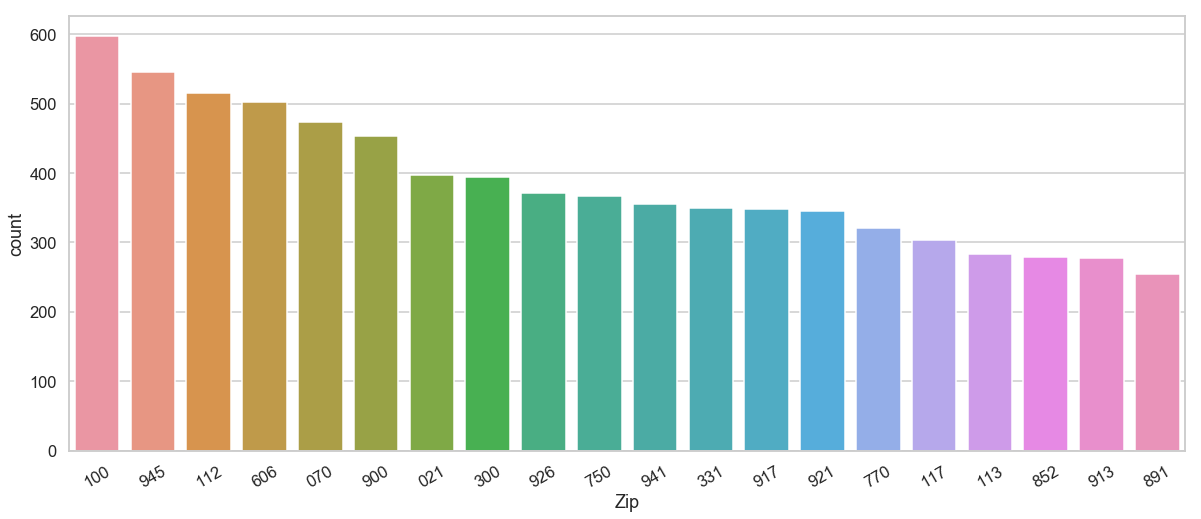

In [129]:
# zip
fig, ax = plt.subplots(figsize = [20,8])
g = sns.countplot(df_loan.Zip, order=df_loan.Zip.value_counts().iloc[:20].index)
g.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

Fact:- Most loans are applied from the areas of Zip- 100, 945, 112, 606, 070

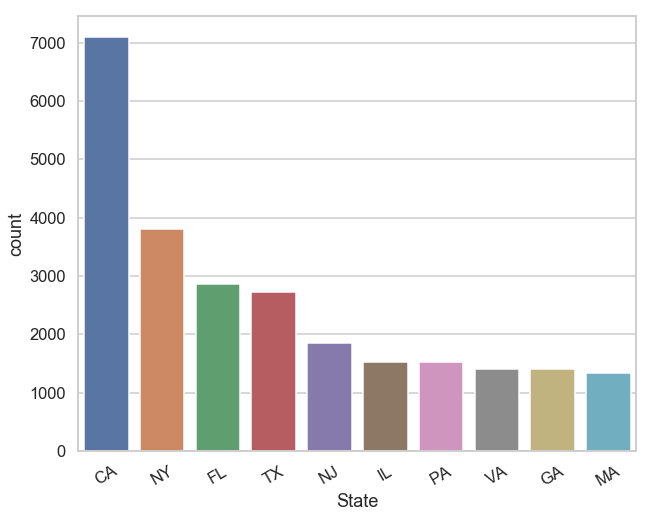

In [130]:
# addr_state
fig, ax = plt.subplots(figsize = [10,8])
g = sns.countplot(df_loan.addr_state, order=df_loan.addr_state.value_counts().iloc[:10].index)
g.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.xlabel('State')
plt.show()

Fact:- Most loans are taken from CA state

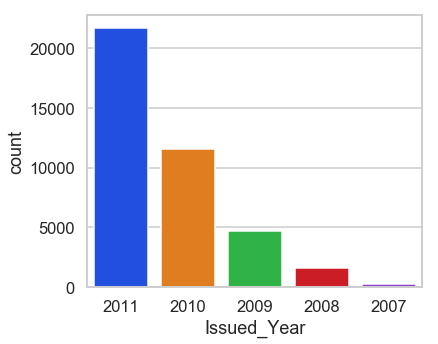

In [131]:
# Issued_Year
fig, ax = plt.subplots(figsize = [6,5])
g = sns.countplot(df_loan.Issued_Year, order=df_loan.Issued_Year.value_counts().index, palette='bright')
g.set_xticklabels(ax.get_xticklabels())
plt.show()

Fact:- Most of the loans have been taken in year 2011, almost doubling each year

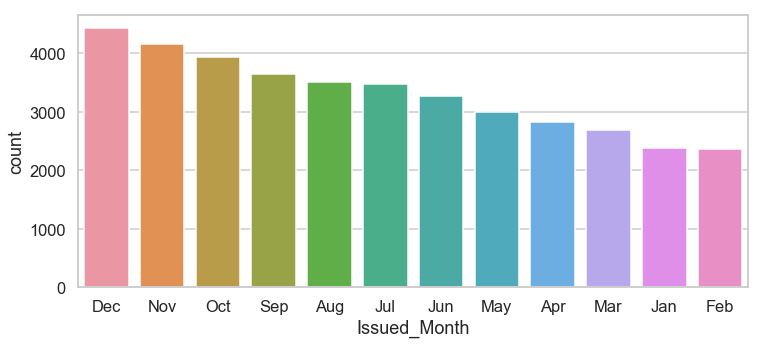

In [132]:
# Issued_Month
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.Issued_Month, order=df_loan.Issued_Month.value_counts().index)
g.set_xticklabels(ax.get_xticklabels())
plt.show()

Fact:- More loans have been issued in the second half of the year

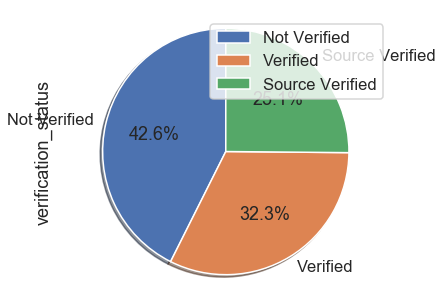

In [133]:
# verification_status
df_loan.verification_status.value_counts().plot(kind='pie',
                            figsize=(6, 5),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            legend=True                   
                           )
plt.axis('equal')

plt.show()

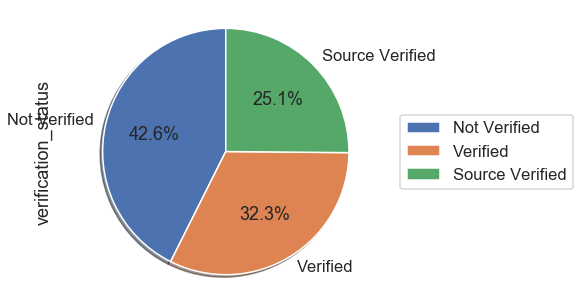

In [134]:
#Repositioning the legend
# verification_status
df_loan.verification_status.value_counts().plot(kind='pie',
                            figsize=(6, 5),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            legend=True                   
                           )
plt.axis('equal')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.show()

Fact:- Almost 43% of loans are Not-Verified. It should be a driving factor for loan default

<div class="alert alert-block alert-info">
<h4>#2 Numerical fields univariate analysis</h4>
    
</div>

In [135]:
# Extracting numerical columns
num_cols = list(df_loan.select_dtypes([np.int64,np.float64]))

In [136]:
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

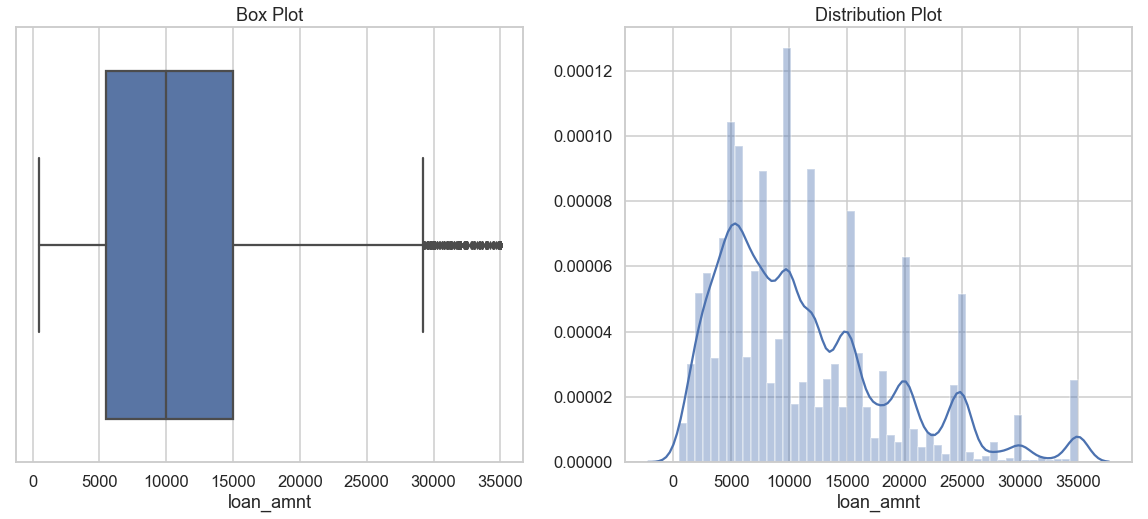

In [137]:
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(df_loan['loan_amnt'])
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_loan['loan_amnt'])
# plt.subplot(1,3,3)
#sns.swarmplot(df_loan['loan_amnt'])
plt.show()

In [138]:
# making function
def plot_box_and_dist(colName):
    plt.figure(1,figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Box Plot")
    sns.boxplot(df_loan[colName])
    plt.subplot(1,2,2)
    plt.title("Distribution Plot")
    sns.distplot(df_loan[colName])

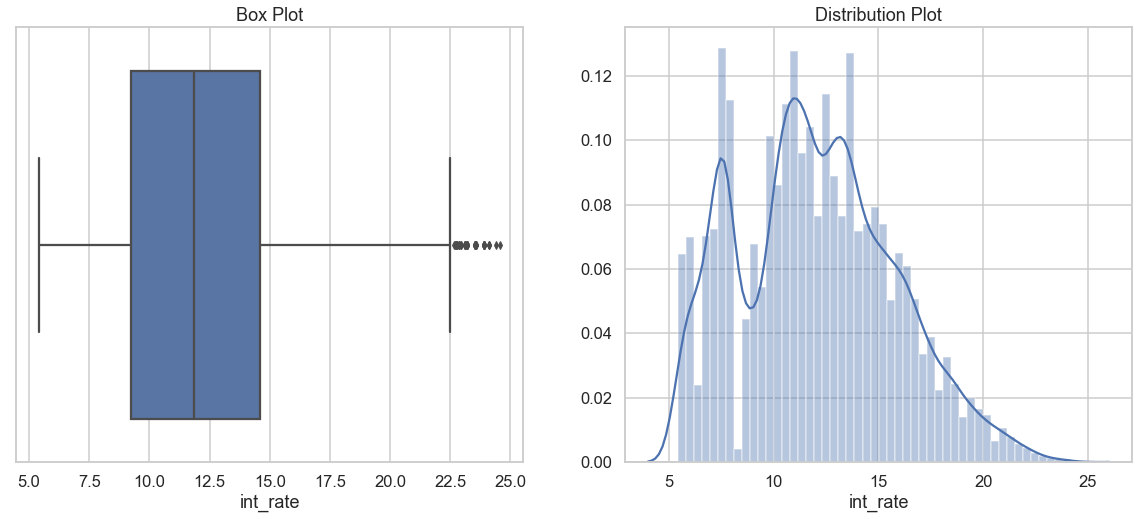

In [139]:
#interest rate
plot_box_and_dist(num_cols[4])

Fact:- Most interest lie between 8 to 14%


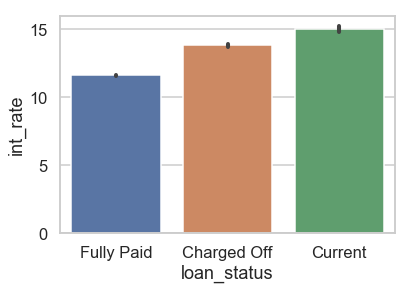

In [140]:
#int_rate with loan_status
sns.barplot(y=df_loan['int_rate'], x=df_loan.loan_status)

Fact:- High interest rate cases loan default

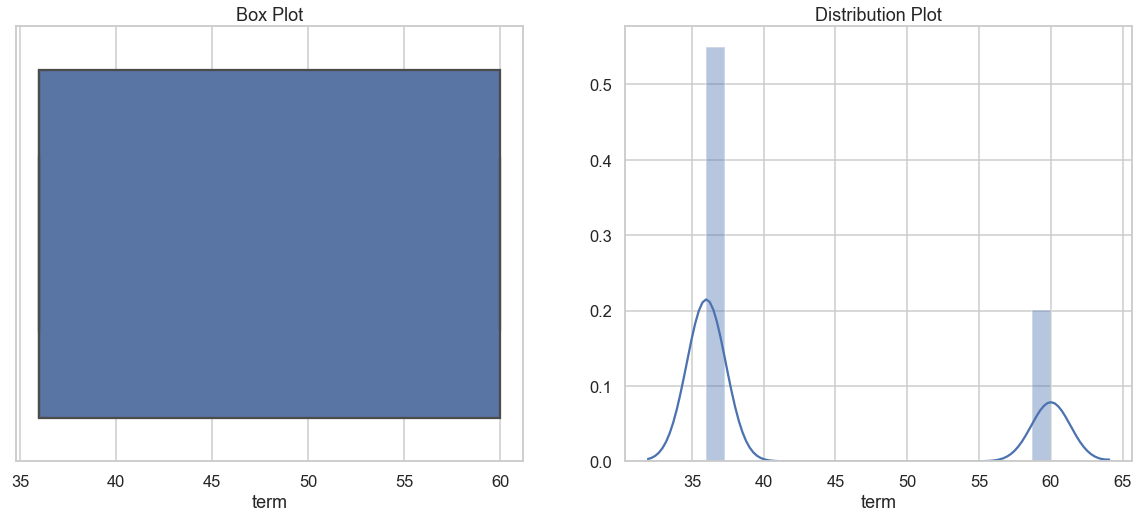

In [141]:
#term
plot_box_and_dist(num_cols[3])

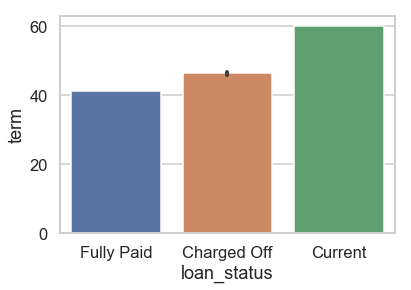

In [142]:
#term with loan_stats 
sns.barplot(y=df_loan.term, x=df_loan.loan_status)

Fact- Higher term rate causes more loan default

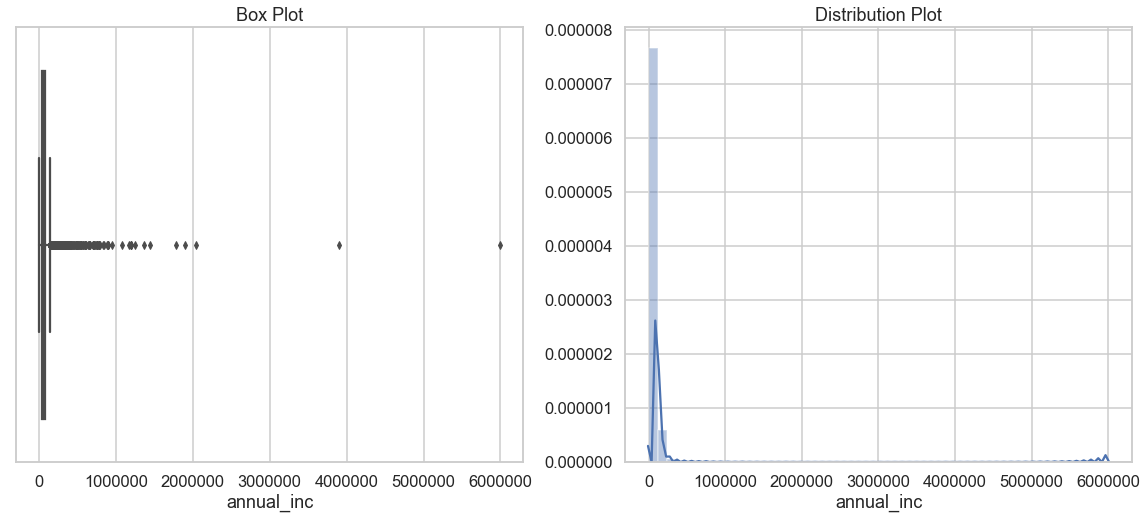

In [143]:
#Annual income
plot_box_and_dist(num_cols[6])

Fact:- Most borrower has low income.But above boxplot seems that there are outliers.

In [144]:
df_loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Fact:- There are outliers, Max value is much higher than mean.<br>One of the most popularly used technique is the Percentile based outlier removal, where we filter out outliers based on **fixed percentile** values. The other techniques in this category include removal based on **z-score, constant values** etc.<br>
Reference:- https://kite.com/blog/python/data-analysis-visualization-python

In [145]:
#detect outlier at thresold 95%
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

Text(0.5, 0, 'annual_inc')

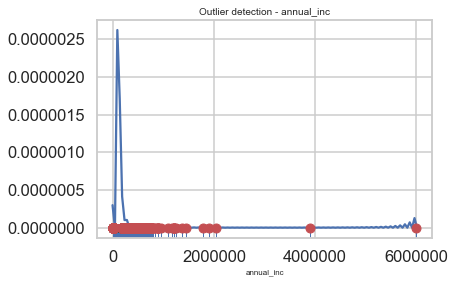

In [146]:
#plotting outliers
x = df_loan['annual_inc']
sns.distplot(x, rug=True, hist=False)
outliers = x[percentile_based_outlier(x)]
plt.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
plt.title('Outlier detection - {}'.format("annual_inc"), fontsize=10)
plt.xlabel("annual_inc", fontsize=8)

In [147]:
#Removing outliers
outlier_margin = df_loan.annual_inc.quantile(0.995)
df_loan = df_loan[df_loan["annual_inc"] < outlier_margin]


Text(0.5, 0, 'annual_inc')

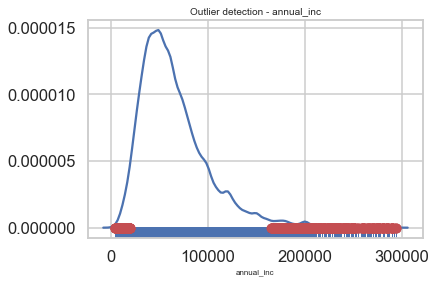

In [148]:
#plotting ouliers again
#plotting outliers
x = df_loan['annual_inc']
sns.distplot(x, rug=True, hist=False)
outliers = x[percentile_based_outlier(x)]
plt.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
plt.title('Outlier detection - {}'.format("annual_inc"), fontsize=10)
plt.xlabel("annual_inc", fontsize=8)

In [149]:
#checking describe
df_loan["annual_inc"].describe()

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

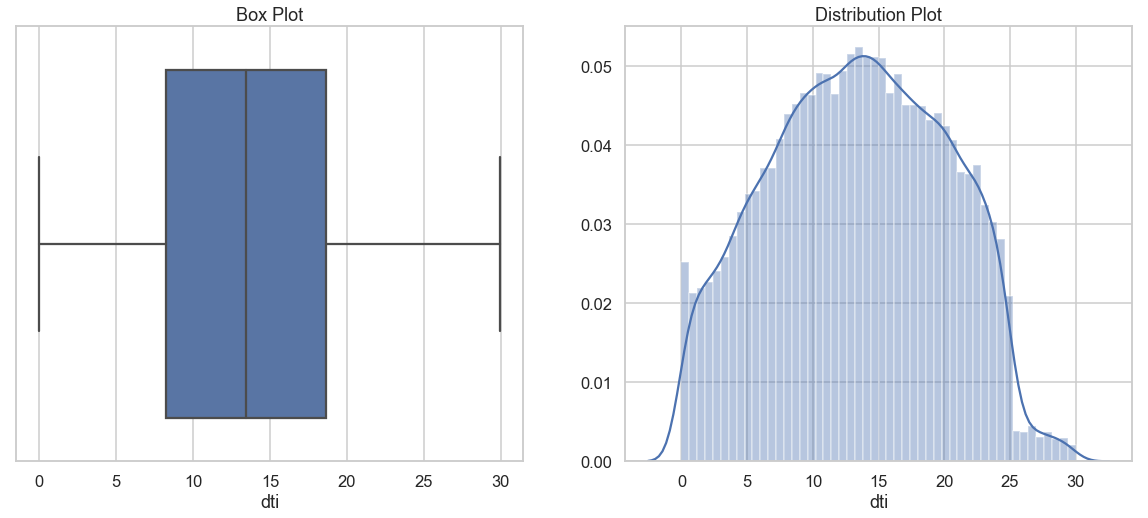

In [150]:
#dti
plot_box_and_dist(num_cols[7])

In [151]:
df_loan.dti.describe()

count    39494.000000
mean        13.356071
std          6.664136
min          0.000000
25%          8.230000
50%         13.450000
75%         18.620000
max         29.990000
Name: dti, dtype: float64

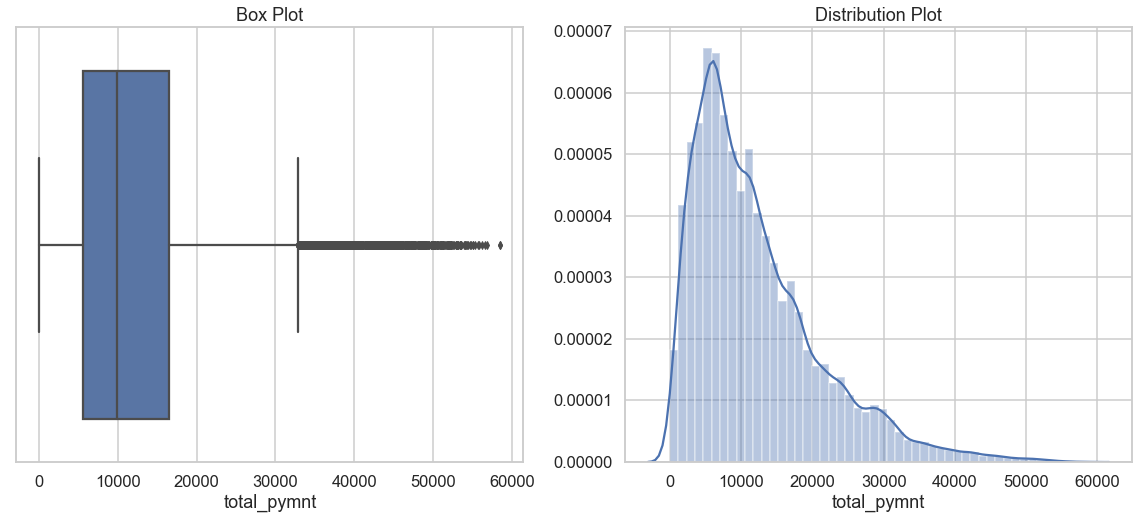

In [152]:
#total payment
plot_box_and_dist(num_cols[17])

In [153]:
df_loan.total_pymnt.describe()

count    39494.000000
mean     12102.093610
std       8985.288316
min          0.000000
25%       5569.368120
50%       9862.788695
75%      16477.967128
max      58563.679930
Name: total_pymnt, dtype: float64

<div class="alert alert-block alert-success">
<h2>Bivariate Analysis</h2>
    
</div>

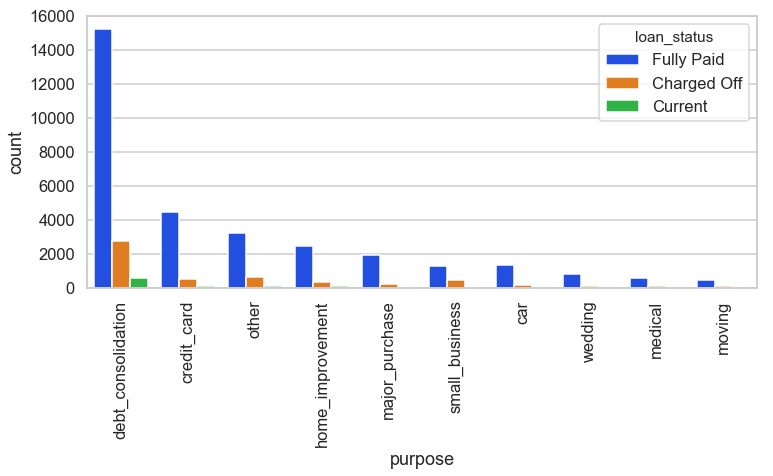

In [154]:
# purpose, loan_status
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.purpose, order=df_loan.purpose.value_counts().iloc[:10].index, hue=df_loan.loan_status
                  , palette='bright')
g.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [155]:
# Mostly defaulter are those members who have taken the loan to pay their debts 
# although most of the people have taken the loan for the same purpose

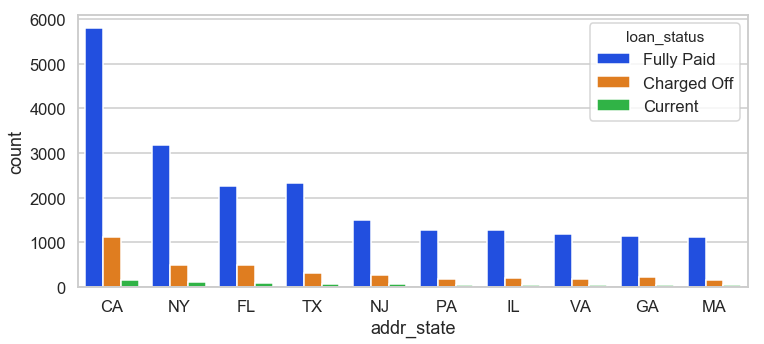

In [156]:
# verification_status, loan_status
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.addr_state, order=df_loan.addr_state.value_counts().iloc[:10].index
                  , hue=df_loan.loan_status
                  , palette='bright')
g.set_xticklabels(ax.get_xticklabels())
plt.show()

In [157]:
# Mostly defaulters are from 'CA' (California)

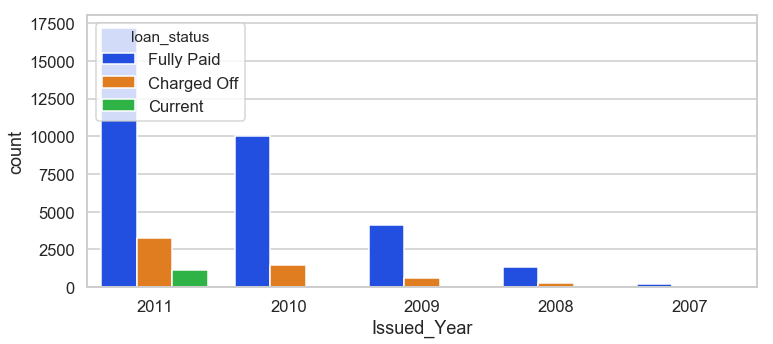

In [158]:
# Issued_Year, loan_status
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.Issued_Year, order=df_loan.Issued_Year.value_counts().index
                  , hue=df_loan.loan_status
                  , palette='bright')
g.set_xticklabels(ax.get_xticklabels())
plt.show()

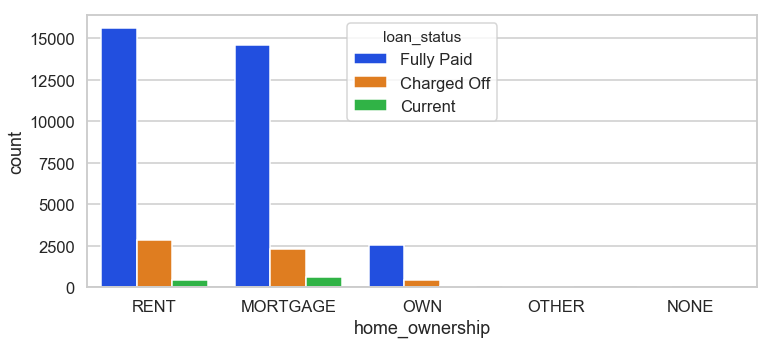

In [159]:
# home_ownership, loan_status
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.home_ownership, order=df_loan.home_ownership.value_counts().index
                  , hue=df_loan.loan_status
                  , palette='bright')
g.set_xticklabels(ax.get_xticklabels())
plt.show()

In [160]:
# Defaulters are most likely from the group of people who are on 'Rent' or on 'Mortgage'

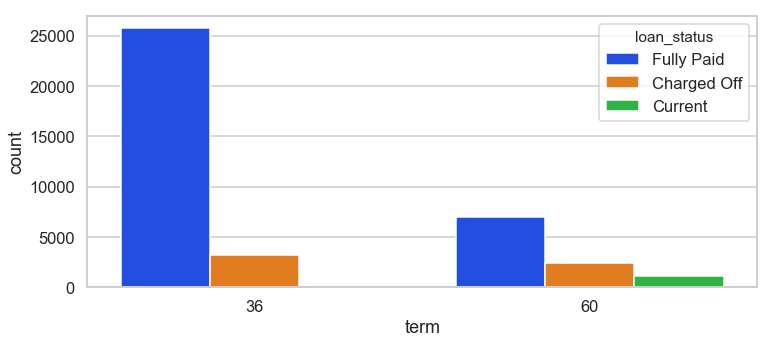

In [161]:
# term, loan_status
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.term, order=df_loan.term.value_counts().index
                  , hue=df_loan.loan_status
                  , palette='bright')
g.set_xticklabels(ax.get_xticklabels())
plt.show()

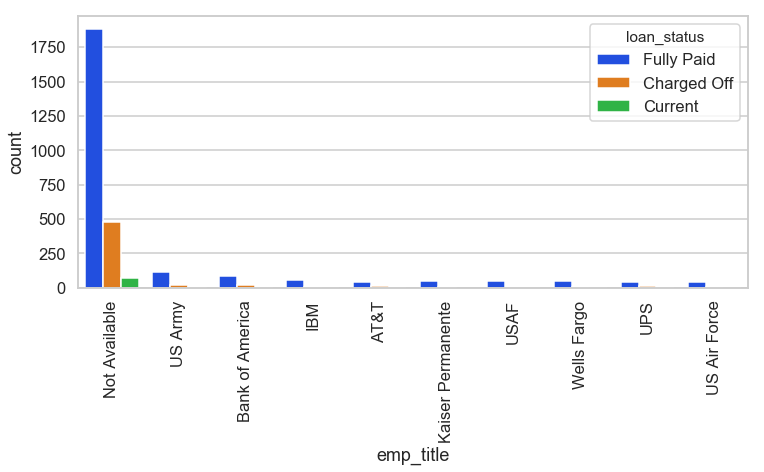

In [162]:
# emp_title, loan_status
fig, ax = plt.subplots(figsize = [12,5])
g = sns.countplot(df_loan.emp_title, order=df_loan.emp_title.value_counts().iloc[:10].index
                  , hue=df_loan.loan_status
                  , palette='bright')
g.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Fact:- Most defaulters have no title, may be they are self-employed or business man

<div class="alert alert-block alert-success">
<h2>Multivariate Analysis</h2>
    
</div>

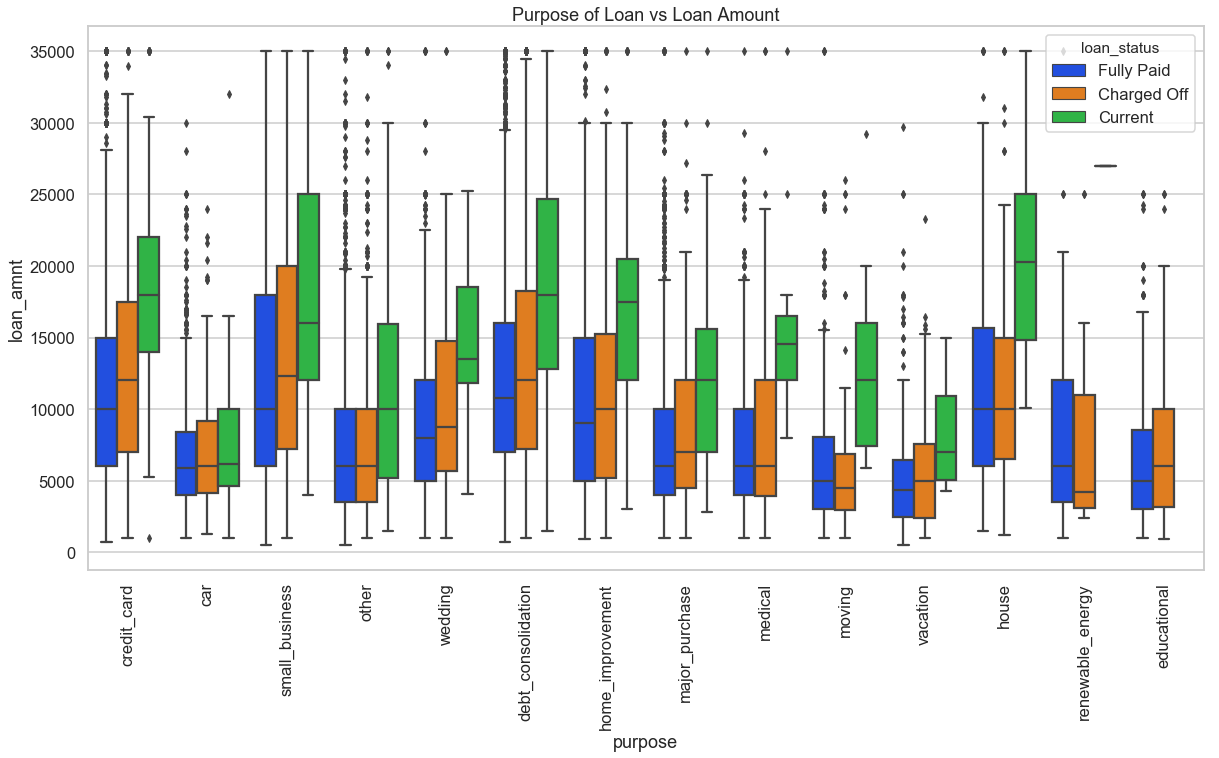

In [163]:
# purpose, loan_status, loan_amnt
fig, ax = plt.subplots(figsize = [20,10])
g = sns.boxplot(data=df_loan, x=df_loan.purpose, y=df_loan.loan_amnt, hue=df_loan.loan_status
                , palette='bright')
g.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [164]:
# Mostly high loan amount in charged off cases then in the fully paid cases

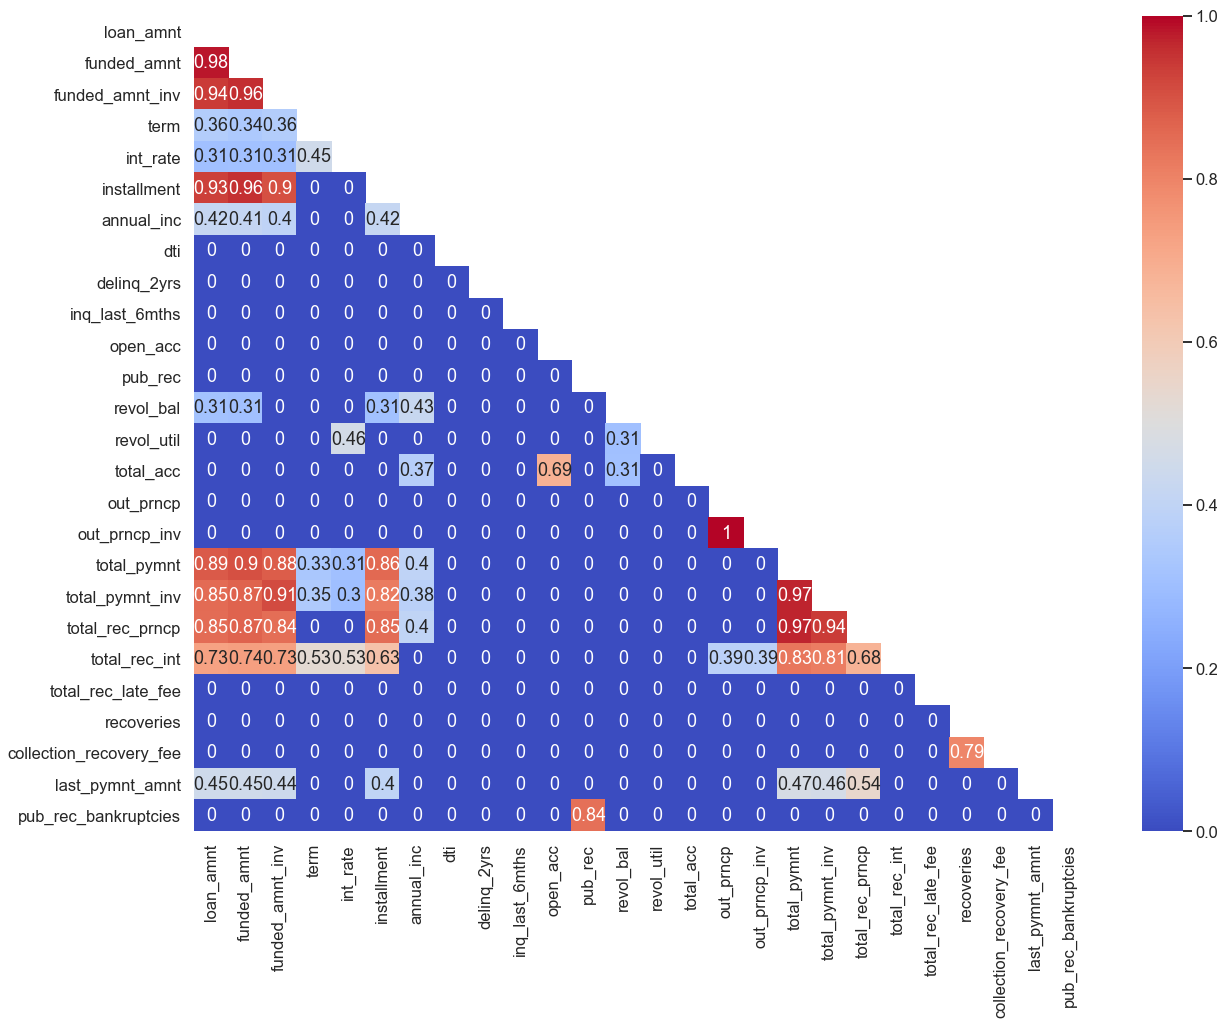

In [165]:
# Correlation
cor = df_loan.corr()
cor[np.abs(cor)<0.3]=0
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = [20,15])
g = sns.heatmap(cor, annot=True, cmap='coolwarm', mask=mask)
plt.show()

#As per above heatmap, loan_amt, funded_amnt, funded_amnt_inv, installment are highly correlated.Let's check one by one with loan_status

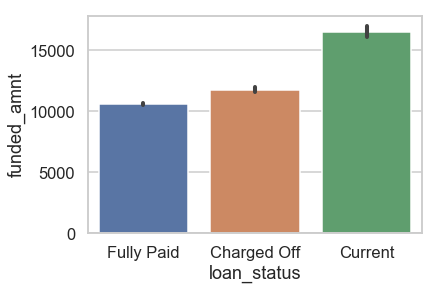

In [166]:
#1.loan_status and funded_amnt
sns.barplot(data=df_loan, x='loan_status', y='funded_amnt')

Fact:- Upto 11000$ borrower become defaulter

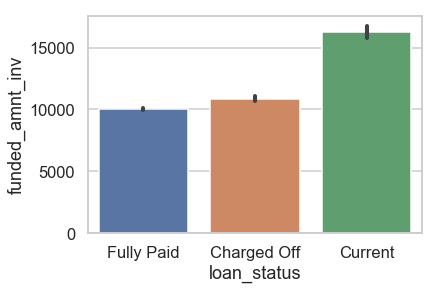

In [167]:
#1.loan_status and funded_amnt_inv
sns.barplot(data=df_loan, x='loan_status', y='funded_amnt_inv')

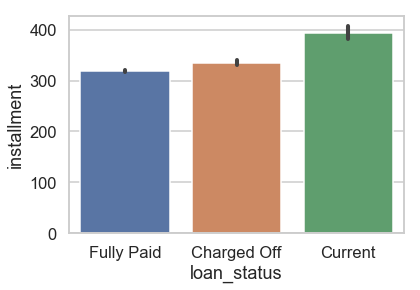

In [168]:
#1.loan_status and funded_amnt_inv
sns.barplot(data=df_loan, x='loan_status', y='installment')

Fact:- Higher installment leads to defaulter case

<div class="alert alert-block alert-success">
<h2>Conlcusion and Recommendations</h2>
    
</div>

- Most of the defaulters are on **'Rent' or on 'Mortgage'**.
- **Purpose** is correlated to loan defaulters- 'Debt_consolidation' is mostly the purpose of loan of the defaulters.
- Mostly defaulters are from **'CA'-California**
- **emp_length** is highly correlated to loan defaulter case- Defaulters are mostly employed for 10 or more years or employed for 1-5 years
- Mostly defaulters have no emp_title
- Some of the defaulters title is from the US forces (Army personnel, Air force, Millitary). The reason of those defaulters 
  might be their death in their service areas.
- Loan approved for higher **installments** attracts default cases
- **Grade**(Lower grade) are more defaulters
- **int_rate** is also correlated to default loan cases(Higher rates more loan default cases)
- **term** is also correlated to default loan cases(Higher term more loan default cases)

<div class="alert alert-block alert-success">
<h3>Pandas Profilling</h3>
    
</div>

In [169]:
import pandas_profiling

pandas_profiling.ProfileReport(df_loan)

Number of variables,45
Number of observations,39494
Total Missing (%),0.0%
Total size in memory,13.6 MiB
Average record size in memory,360.0 B
Numeric,19
Categorical,18
Boolean,1
Date,0
Text (Unique),0
Rejected,7


<div class="alert alert-block alert-success">
<h3>References</h3>
    
</div>

- https://kite.com/blog/python/data-analysis-visualization-python
- https://www.valuepenguin.com/loans/what-does-it-mean-to-default-on-a-loan
- https://www.creditkarma.com/advice/i/what-is-a-charge-off/

<div class="alert alert-block alert-info">
<h3>Thank You<br>Vikash</h3>
    
</div>